In [17]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # common package to interact with a dataset that is stored on an H5 file.
import scipy
import os
from scipy import ndimage

In [18]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

In [19]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [20]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()

print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)


In [21]:
m_train = X_train.shape[0]
num_px =  X_train.shape[1]
m_test =  X_test.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


y = [1], it's a 'cat' picture.


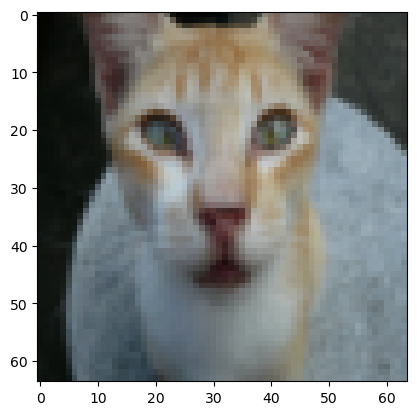

In [22]:
index = 11
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

y = [0], it's a 'non-cat' picture.


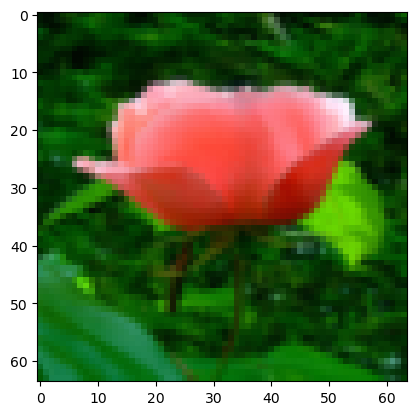

In [23]:
index = 3
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [24]:
print ('Label 1 count:', np.sum(Y_train!=0))
print ('Label 0 count:', np.sum(Y_train==0))

Label 1 count: 72
Label 0 count: 137


In [25]:
X_train_flatten = X_train.reshape(-1, num_px*num_px*3)
X_test_flatten =  X_test.reshape(-1, num_px*num_px*3)

print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]


In [26]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [27]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size.
    
    Return:
    g -- sigmoid(z)
    """
    g = 1/(1 + np.exp(-z))
    return g

In [28]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [29]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1,dim) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (1,dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros. 
    # START_CODE   
    w = np.zeros((1, dim))
    b = 0
    # END_CODE 

    assert(w.shape == (1,dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [30]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0.]]
b = 0


In [31]:
def propagate(w, b, X, Y, C = 1):
    """
    Implement the cost function and its gradient for the propagation explained above
    
    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[0]
    Z = b + np.dot(X, w.T)
    A = sigmoid(Z)
    cost = (-1.0 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) * C + 1/(2*m) * np.sum(w**2)
    
    dJ_dw = (1/m) * np.dot((A-Y).T, X) * C + 1/m * w
    dJ_db = (1/m) * np.sum(A - Y)

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

In [32]:
w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y, 1)
print ("dJ_dw = " + str(grads["dJ_dw"]))
print ("dJ_db = " + str(grads["dJ_db"]))
print ("cost = " + str(cost))

dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865


In [33]:
def optimize(w, b, X, Y, num_iterations, learning_rate, C = 1, verbose = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = [] # keep history for plotting if necessary 
    
    for i in range(num_iterations):         
        grads, cost = propagate(w, b, X, Y, C)
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs

In [34]:
params1, grads1, costs1 = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params1["w"]))
print ("b = " + str(params1["b"]))
print ("dw = " + str(grads1["dJ_dw"]))
print ("db = " + str(grads1["dJ_db"]))

w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479


In [35]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w - weights, a numpy array of size (1,num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)
    
    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m,n = X.shape
    assert (w.shape==(1,n))
    
    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    # START_CODE   
    A = sigmoid(b + np.dot(X, w.T))
    # END_CODE 

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1 
    # START_CODE   
    Y_prediction = np.where(A >= 0.5, 1, 0)
    # END_CODE 
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

In [36]:
w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))

predictions = 
[[1]
 [1]
 [0]]


In [37]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C = 1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter 
    
    Returns:
    res -- dictionary containing information about the model.
    """
    
    # YOUR_CODE.
    # START_CODE   

    #  initialize parameters
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)
    
    # run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)
    
    # retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # END_CODE 

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))
    
    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test, 
           'Y_prediction_train' : Y_prediction_train, 
           'w' : w, 
           'b' : b,
           'learning_rate' : learning_rate,
           'num_iterations': num_iterations,
           'C':C
          }
    
    return res

In [55]:
res = model(X_train= X_train_scaled,
            Y_train=Y_train, 
            X_test=X_test_scaled, 
            Y_test= Y_test, 
            num_iterations = 3000, 
            learning_rate = 0.005, 
            verbose = True,
            C = 0.3 #not doing much to change the acuracy, learning rate, howewer, does
           )

Cost after iteration 0: 0.207944
Cost after iteration 100: 0.171627
Cost after iteration 200: 0.158808
Cost after iteration 300: 0.149346
Cost after iteration 400: 0.141692
Cost after iteration 500: 0.135217
Cost after iteration 600: 0.129593
Cost after iteration 700: 0.124622
Cost after iteration 800: 0.120172
Cost after iteration 900: 0.116150
Cost after iteration 1000: 0.112486
Cost after iteration 1100: 0.109128
Cost after iteration 1200: 0.106034
Cost after iteration 1300: 0.103170
Cost after iteration 1400: 0.100508
Cost after iteration 1500: 0.098026
Cost after iteration 1600: 0.095704
Cost after iteration 1700: 0.093526
Cost after iteration 1800: 0.091479
Cost after iteration 1900: 0.089549
Cost after iteration 2000: 0.087728
Cost after iteration 2100: 0.086005
Cost after iteration 2200: 0.084372
Cost after iteration 2300: 0.082823
Cost after iteration 2400: 0.081351
Cost after iteration 2500: 0.079950
Cost after iteration 2600: 0.078615
Cost after iteration 2700: 0.077342
Cost

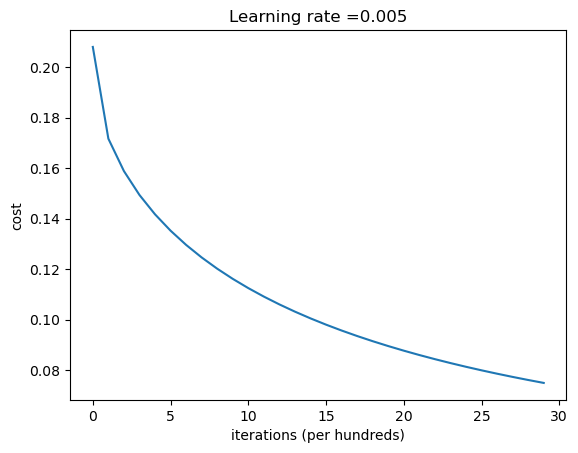

In [56]:
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()

In [57]:
Y_test[index,0], res["Y_prediction_test"][index,0]

(1, 1)

In [58]:
index = 1

Y_test[index,0]

1

image.size=  (64, 64)


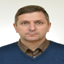

In [59]:
from PIL import Image
file_name=  os.path.join(path , 'Oleksiy.Tsebriy.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print ('image.size= ', image.size)
image

In [60]:
my_image= np.array(image.getdata())
my_image.shape

(4096, 3)

In [61]:
my_image= my_image.reshape((1, num_px*num_px*3))
print ('my_image.shape=',my_image.shape)
my_image

my_image.shape= (1, 12288)


array([[227, 227, 217, ...,  43,  65,  96]])

In [62]:
my_predicted_image = predict(res["w"], res["b"], my_image)
my_predicted_image
print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))

y = 0 , your algorithm predicts a non-cat picture.


C:\Users\PotatoX8x\AppData\Local\Temp\ipykernel_11788\2538018704.py:11: RuntimeWarning: overflow encountered in exp
  g = 1/(1 + np.exp(-z))


image.size=  (64, 64)


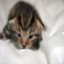

In [63]:
file_name=  os.path.join(path , 'test_cat.jpg')
image = Image.open(file_name).resize((num_px,num_px))
print ('image.size= ', image.size)
image

In [64]:
my_image= np.array(image.getdata())[:,:3] # by unknown reason picture made as screenshot has 4 channels 
print ('my_image.shape=', my_image.shape)
my_image= my_image.reshape((1, num_px*num_px*3))
print ('after reshape: my_image.shape=',my_image.shape)
my_predicted_image = predict(res["w"], res["b"], my_image)

print('y = {} , your algorithm predicts a {} picture.'.
      format(np.squeeze(my_predicted_image),classes[np.squeeze(my_predicted_image)]))


my_image.shape= (4096, 3)
after reshape: my_image.shape= (1, 12288)
y = 1 , your algorithm predicts a cat picture.


In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
y_train = np.squeeze(Y_train) # LogisticRegression requires 1d input for y
clf = LogisticRegression(C=0.01).fit(X_train_scaled, y_train)

In [67]:
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
y_test = np.squeeze(Y_test)
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 90.909%
test accuracy= 66.000%


In [69]:
print('y = {} , sklearn algorithm predicts a {} picture.'.
      format(np.squeeze(clf.predict(my_image)),classes[np.squeeze(clf.predict(my_image))]))

y = 1 , sklearn algorithm predicts a cat picture.
